# Machine Learning
## A comparison of SGD optimizers

### Name: Aysan Esmradi 



In [786]:
!pip install -U d2l

In [828]:
import timeit

In [829]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import random
import matplotlib.pyplot as plt
%matplotlib inline

## First Task: Image Classification with Neural Network
In here, We implement a neural networks using PyTorch to classify images of Fashion MNIST dataset which this dataset consists of images from 10 categories, each represented by 6000 images in the training dataset and by 1000 in the test dataset. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [830]:
# Load the train and test dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=128)
test_dataloader = DataLoader(test_data, batch_size=128)

In [831]:
len(train_dataloader)

469

In [832]:
len(test_dataloader.dataset)

10000

In [833]:
len(test_dataloader)

79

In [834]:
#Constrict our model, The model includes a linear layer then relu layer, linear layer, relu layer, linear layer.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [835]:
#Setting the hyperparameter for training

learning_rate = 1e-3
batch_size = 512

In [836]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### SGD

In [837]:
#Set The optimizer , The purpose of this project is to compare the results of different optimizers. 
#At the first, we are using from the Stochastic Gradient Descent.

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [838]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0


    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    #print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    Acc_test = 100*correct
    Avg_loss = test_loss
    return Acc_test , Avg_loss

In [839]:
# Specify a list to store the result
result_list = []
def store_result(cur_result_list, i_opt, i_epoch, i_Acc, i_Avg):
    new_result={
        'Optimizer': i_opt,
        'epoch': i_epoch,
        'Accuracy': i_Acc,
        'Avg loss': i_Avg
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

In [840]:
#Specify a list to store the run time of the optimizers
run_time_list = []
def store_time(cur_result_list, i_opt, i_time):
    new_result={
        'Optimizer': i_opt,
        'run time': i_time
    }
    cur_result_list.append(new_result)
    
    return cur_result_list


In [841]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Acc_list_SGD = []
Avg_list_SGD = []
optimizer_name = 'SGD'
start = timeit.default_timer()

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    #test_loop(test_dataloader, model, loss_fn)
    Acc_test , Avg_loss = test_loop(test_dataloader, model, loss_fn)
    Acc_list_SGD.append(Acc_test)
    Avg_list_SGD.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)
    
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298554  [    0/60000]
loss: 2.276199  [12800/60000]
loss: 2.257149  [25600/60000]
loss: 2.254340  [38400/60000]
loss: 2.229220  [51200/60000]
Test Error: 
 Accuracy: 34.7%, Avg loss: 2.218270 

Epoch 2
-------------------------------
loss: 2.221452  [    0/60000]
loss: 2.188886  [12800/60000]
loss: 2.173527  [25600/60000]
loss: 2.172279  [38400/60000]
loss: 2.136991  [51200/60000]
Test Error: 
 Accuracy: 40.5%, Avg loss: 2.123207 

Epoch 3
-------------------------------
loss: 2.124773  [    0/60000]
loss: 2.077135  [12800/60000]
loss: 2.061651  [25600/60000]
loss: 2.056193  [38400/60000]
loss: 2.010720  [51200/60000]
Test Error: 
 Accuracy: 46.8%, Avg loss: 1.989730 

Epoch 4
-------------------------------
loss: 1.985373  [    0/60000]
loss: 1.918671  [12800/60000]
loss: 1.902418  [25600/60000]
loss: 1.888849  [38400/60000]
loss: 1.843741  [51200/60000]
Test Error: 
 Accuracy: 50.1%, Avg loss: 1.813331 

Epoch 5
------------------------

In [842]:
run_time_list

[{'Optimizer': 'SGD', 'run time': 195.771498600021}]

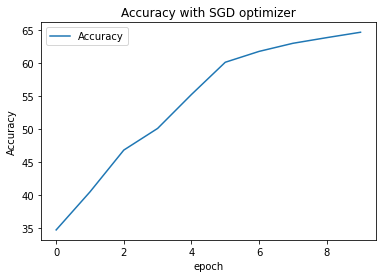

In [843]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_SGD,label='Accuracy')

plt.title('Accuracy with SGD optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

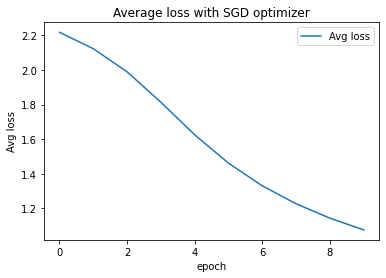

In [844]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_SGD,label='Avg loss')

plt.title('Average loss with SGD optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### SGD with Momentum

In [845]:
#conduct the train and test
#The momentum term is usually set to 0.9
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

Acc_list_Momentum = []
Avg_list_Momentum = []
optimizer_name = 'Momentum'
start = timeit.default_timer()

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    #test_loop(test_dataloader, model, loss_fn)
    Acc_test , Avg_loss = test_loop(test_dataloader, model, loss_fn)
    Acc_list_Momentum.append(Acc_test)
    Avg_list_Momentum.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)
    
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 1.040099  [    0/60000]
loss: 0.880528  [12800/60000]
loss: 0.838497  [25600/60000]
loss: 0.808203  [38400/60000]
loss: 0.798421  [51200/60000]
Test Error: 
 Accuracy: 71.0%, Avg loss: 0.785112 

Epoch 2
-------------------------------
loss: 0.703435  [    0/60000]
loss: 0.627298  [12800/60000]
loss: 0.662562  [25600/60000]
loss: 0.672996  [38400/60000]
loss: 0.683852  [51200/60000]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.682730 

Epoch 3
-------------------------------
loss: 0.575881  [    0/60000]
loss: 0.523914  [12800/60000]
loss: 0.573212  [25600/60000]
loss: 0.593579  [38400/60000]
loss: 0.621056  [51200/60000]
Test Error: 
 Accuracy: 78.6%, Avg loss: 0.618642 

Epoch 4
-------------------------------
loss: 0.496696  [    0/60000]
loss: 0.464826  [12800/60000]
loss: 0.520095  [25600/60000]
loss: 0.542490  [38400/60000]
loss: 0.583863  [51200/60000]
Test Error: 
 Accuracy: 79.9%, Avg loss: 0.575929 

Epoch 5
------------------------

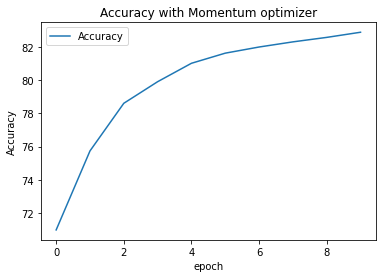

In [846]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_Momentum,label='Accuracy')

plt.title('Accuracy with Momentum optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

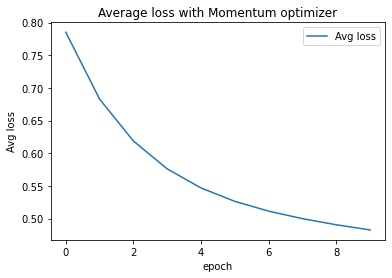

In [847]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_Momentum,label='Avg loss')

plt.title('Average loss with Momentum optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### Adagrad

In [848]:
#Implementing with the other optimizers
#We can also add some other optional parameters like lr_decay (learning rate decay (default: 0)) but we try to have similar 
# conditions with SGD to have better comparison.
#in here we are using from the prepared function from: https://pytorch.org/docs/stable/optim.html
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)


In [849]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

Acc_list_Adagrad = []
Avg_list_Adagrad = []
optimizer_name = 'Adagrad'

start = timeit.default_timer()
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    
    Acc_test , Avg_loss = test_loop(test_dataloader, model, loss_fn)
    Acc_list_Adagrad.append(Acc_test)
    Avg_list_Adagrad.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)

stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.306706  [    0/60000]
loss: 0.380393  [12800/60000]
loss: 0.370523  [25600/60000]
loss: 0.416433  [38400/60000]
loss: 0.472949  [51200/60000]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.447883 

Epoch 2
-------------------------------
loss: 0.253491  [    0/60000]
loss: 0.325142  [12800/60000]
loss: 0.338461  [25600/60000]
loss: 0.390046  [38400/60000]
loss: 0.443505  [51200/60000]
Test Error: 
 Accuracy: 84.7%, Avg loss: 0.430962 

Epoch 3
-------------------------------
loss: 0.241337  [    0/60000]
loss: 0.305721  [12800/60000]
loss: 0.321278  [25600/60000]
loss: 0.374673  [38400/60000]
loss: 0.425695  [51200/60000]
Test Error: 
 Accuracy: 85.1%, Avg loss: 0.419413 

Epoch 4
-------------------------------
loss: 0.232854  [    0/60000]
loss: 0.292406  [12800/60000]
loss: 0.310456  [25600/60000]
loss: 0.363809  [38400/60000]
loss: 0.412838  [51200/60000]
Test Error: 
 Accuracy: 85.4%, Avg loss: 0.410792 

Epoch 5
------------------------

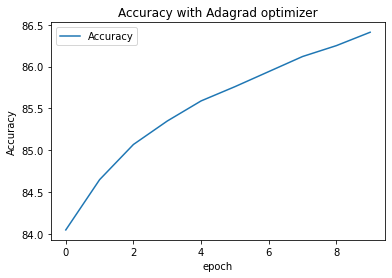

In [850]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_Adagrad,label='Accuracy')

plt.title('Accuracy with Adagrad optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

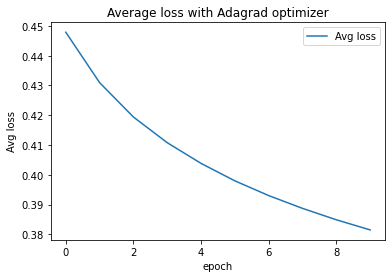

In [851]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_Adagrad,label='Avg loss')

plt.title('Average loss with Adagrad optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### Adam

In [852]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
Acc_list_Adam = []
Avg_list_Adam = []
optimizer_name = 'Adam'
start = timeit.default_timer()
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    
    Acc_test , Avg_loss = test_loop(test_dataloader, model, loss_fn)
    Acc_list_Adam.append(Acc_test)
    Avg_list_Adam.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)

stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.202352  [    0/60000]
loss: 0.331197  [12800/60000]
loss: 0.363116  [25600/60000]
loss: 0.378975  [38400/60000]
loss: 0.398358  [51200/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.410335 

Epoch 2
-------------------------------
loss: 0.244929  [    0/60000]
loss: 0.279142  [12800/60000]
loss: 0.296167  [25600/60000]
loss: 0.320018  [38400/60000]
loss: 0.362416  [51200/60000]
Test Error: 
 Accuracy: 86.0%, Avg loss: 0.378056 

Epoch 3
-------------------------------
loss: 0.222689  [    0/60000]
loss: 0.241746  [12800/60000]
loss: 0.301774  [25600/60000]
loss: 0.267646  [38400/60000]
loss: 0.309364  [51200/60000]
Test Error: 
 Accuracy: 86.8%, Avg loss: 0.361153 

Epoch 4
-------------------------------
loss: 0.213496  [    0/60000]
loss: 0.216219  [12800/60000]
loss: 0.300099  [25600/60000]
loss: 0.223492  [38400/60000]
loss: 0.257111  [51200/60000]
Test Error: 
 Accuracy: 86.8%, Avg loss: 0.355994 

Epoch 5
------------------------

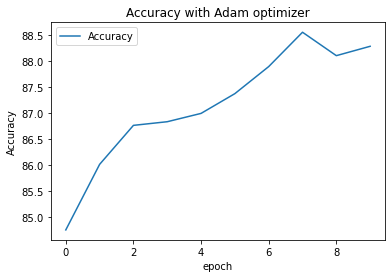

In [853]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_Adam,label='Accuracy')

plt.title('Accuracy with Adam optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

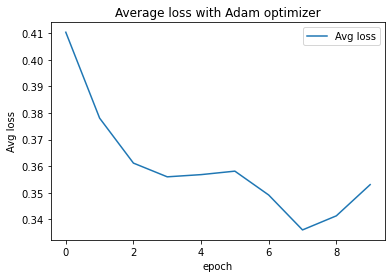

In [854]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_Adam,label='Avg loss')

plt.title('Average loss with Adam optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### NAdam

In [855]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)
Acc_list_NAdam = []
Avg_list_NAdam = []
optimizer_name = 'NAdam'
start = timeit.default_timer()
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    
    Acc_test , Avg_loss = test_loop(test_dataloader, model, loss_fn)
    Acc_list_NAdam.append(Acc_test)
    Avg_list_NAdam.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)

stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.143319  [    0/60000]
loss: 0.165456  [12800/60000]
loss: 0.183030  [25600/60000]
loss: 0.180064  [38400/60000]
loss: 0.172328  [51200/60000]
Test Error: 
 Accuracy: 89.0%, Avg loss: 0.334251 

Epoch 2
-------------------------------
loss: 0.122794  [    0/60000]
loss: 0.137027  [12800/60000]
loss: 0.202586  [25600/60000]
loss: 0.117368  [38400/60000]
loss: 0.147754  [51200/60000]
Test Error: 
 Accuracy: 88.9%, Avg loss: 0.355570 

Epoch 3
-------------------------------
loss: 0.118385  [    0/60000]
loss: 0.129049  [12800/60000]
loss: 0.163622  [25600/60000]
loss: 0.106534  [38400/60000]
loss: 0.131825  [51200/60000]
Test Error: 
 Accuracy: 89.2%, Avg loss: 0.354707 

Epoch 4
-------------------------------
loss: 0.121603  [    0/60000]
loss: 0.118636  [12800/60000]
loss: 0.169388  [25600/60000]
loss: 0.107648  [38400/60000]
loss: 0.164209  [51200/60000]
Test Error: 
 Accuracy: 89.1%, Avg loss: 0.366781 

Epoch 5
------------------------

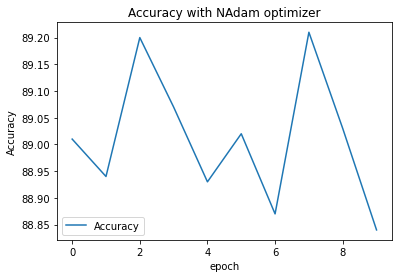

In [856]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_NAdam,label='Accuracy')

plt.title('Accuracy with NAdam optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

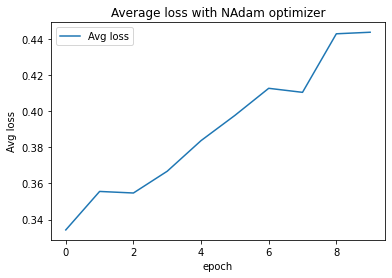

In [857]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_NAdam,label='Avg loss')

plt.title('Average loss with NAdam optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### RMSprop

In [858]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
Acc_list_RMSprop = []
Avg_list_RMSprop = []
optimizer_name = 'RMSprop'
start = timeit.default_timer()
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    
    Acc_test , Avg_loss = test_loop(test_dataloader, model, loss_fn)
    Acc_list_RMSprop.append(Acc_test)
    Avg_list_RMSprop.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)

stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.064095  [    0/60000]
loss: 0.172979  [12800/60000]
loss: 0.179205  [25600/60000]
loss: 0.125778  [38400/60000]
loss: 0.114099  [51200/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.463059 

Epoch 2
-------------------------------
loss: 0.044137  [    0/60000]
loss: 0.122389  [12800/60000]
loss: 0.124243  [25600/60000]
loss: 0.095530  [38400/60000]
loss: 0.160076  [51200/60000]
Test Error: 
 Accuracy: 89.0%, Avg loss: 0.473297 

Epoch 3
-------------------------------
loss: 0.077607  [    0/60000]
loss: 0.114093  [12800/60000]
loss: 0.121211  [25600/60000]
loss: 0.057697  [38400/60000]
loss: 0.075921  [51200/60000]
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.461653 

Epoch 4
-------------------------------
loss: 0.070745  [    0/60000]
loss: 0.136127  [12800/60000]
loss: 0.119876  [25600/60000]
loss: 0.067221  [38400/60000]
loss: 0.072306  [51200/60000]
Test Error: 
 Accuracy: 88.8%, Avg loss: 0.458889 

Epoch 5
------------------------

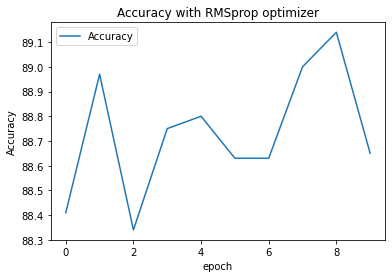

In [859]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_RMSprop,label='Accuracy')

plt.title('Accuracy with RMSprop optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

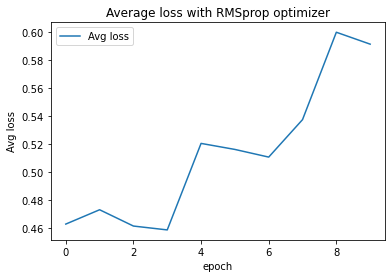

In [860]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_RMSprop,label='Avg loss')

plt.title('Average loss with RMSprop optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

In [861]:
result_df = pd.DataFrame.from_dict(result_list)
result_df

,Optimizer,epoch,Accuracy,Avg loss
0,SGD,0,34.68,2.218270
1,SGD,1,40.46,2.123207
2,SGD,2,46.81,1.989730
3,SGD,3,50.10,1.813331
4,SGD,4,55.25,1.625240
5,SGD,5,60.15,1.461076
6,SGD,6,61.80,1.329755
7,SGD,7,63.03,1.226067
8,SGD,8,63.89,1.142864
9,SGD,9,64.71,1.075089


In [862]:
time_df = pd.DataFrame.from_dict(run_time_list)
time_df

,Optimizer,run time
0,SGD,195.771499
1,Momentum,152.045606
2,Adagrad,149.414731
3,Adam,159.105349
4,NAdam,163.603274
5,RMSprop,159.611195


(0.9, 100.0)

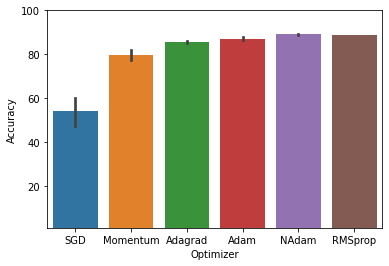

In [863]:
import seaborn as sns

fig , ax  = plt.subplots()
sns.barplot(x ='Optimizer',y='Accuracy' , data=result_df)
ax.set_ylim(0.9,100)

(0.9, 450.0)

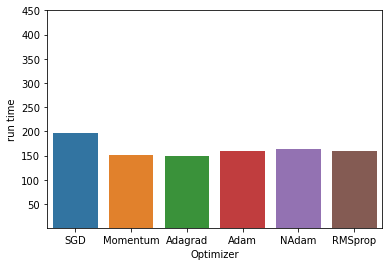

In [864]:
import seaborn as sns

fig , ax  = plt.subplots()
sns.barplot(x ='Optimizer',y='run time' , data=time_df)
ax.set_ylim(0.9,450)

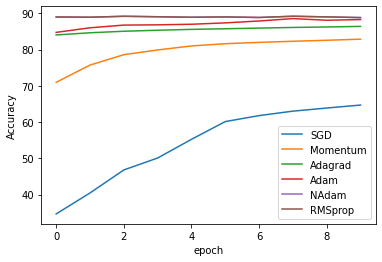

In [865]:
plt.plot(k_epoch,Acc_list_SGD, label = 'SGD')
plt.plot(k_epoch,Acc_list_Momentum, label = 'Momentum')
plt.plot(k_epoch,Acc_list_Adagrad, label = 'Adagrad')
plt.plot(k_epoch,Acc_list_Adam, label = 'Adam')
plt.plot(k_epoch,Acc_list_NAdam, label = 'NAdam')
plt.plot(k_epoch,Acc_list_NAdam, label = 'RMSprop')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

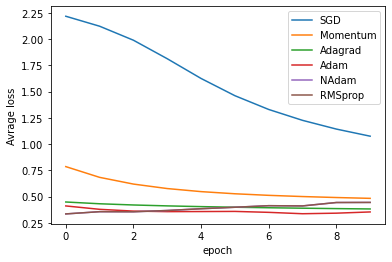

In [866]:
plt.plot(k_epoch,Avg_list_SGD, label = 'SGD')
plt.plot(k_epoch,Avg_list_Momentum, label = 'Momentum')
plt.plot(k_epoch,Avg_list_Adagrad, label = 'Adagrad')
plt.plot(k_epoch,Avg_list_Adam, label = 'Adam')
plt.plot(k_epoch,Avg_list_NAdam, label = 'NAdam')
plt.plot(k_epoch,Avg_list_NAdam, label = 'RMSprop')
plt.xlabel('epoch')
plt.ylabel('Avrage loss')
plt.legend()
plt.show()

## Second Task: Classification model with simple RNN

The task is to build a simple classification model that can correctly determine the nationality of a person given their name. 

In [867]:
import numpy as np
import math

In [868]:
import timeit

In [869]:
import os
import random
from string import ascii_letters

import torch
from torch import nn
import torch.nn.functional as F
from unidecode import unidecode

_ = torch.manual_seed(42)

In [870]:
#specify a directory, specify a directory,construct a dictionary that maps a language to a numerical label.
data_dir = "./data/data/names"

lang2label = {
    file_name.split(".")[0]: torch.tensor([i], dtype=torch.long)
    for i, file_name in enumerate(os.listdir(data_dir))
}

In [871]:
lang2label

{'Arabic': tensor([0]),
 'Chinese': tensor([1]),
 'Czech': tensor([2]),
 'Dutch': tensor([3]),
 'English': tensor([4]),
 'French': tensor([5]),
 'German': tensor([6]),
 'Greek': tensor([7]),
 'Irish': tensor([8]),
 'Italian': tensor([9]),
 'Japanese': tensor([10]),
 'Korean': tensor([11]),
 'Polish': tensor([12]),
 'Portuguese': tensor([13]),
 'Russian': tensor([14]),
 'Scottish': tensor([15]),
 'Spanish': tensor([16]),
 'Vietnamese': tensor([17])}

In [872]:
num_langs = len(lang2label)

In [873]:
#Preprocessing
unidecode("Ślusàrski")

'Slusarski'

In [874]:
char2idx = {letter: i for i, letter in enumerate(ascii_letters + " .,:;-'")}
num_letters = len(char2idx); num_letters
print(num_letters)

59


We see that there are a total of 59 tokens in our character vocabulary. This includes spaces and punctuations.

In [875]:
def name2tensor(name):
    tensor = torch.zeros(len(name), 1, num_letters)
    for i, char in enumerate(name):
        tensor[i][0][char2idx[char]] = 1
    return tensor

In [876]:
name2tensor("aysan")

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

In [877]:
#We see that there are a total of 59 tokens in our character vocabulary. This includes spaces and punctuations
tensor_names = []
target_langs = []

for file in os.listdir(data_dir):
        f= open(os.path.join(data_dir, file), encoding='utf-8')
        lang = file.split(".")[0]
        names =[unidecode(line.rstrip()) for line in f]
        for name in names:
            try:
                tensor_names.append(name2tensor(name))
                target_langs.append(lang2label[lang])
            except KeyError:
                pass


In [878]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(
    range(len(target_langs)), 
    test_size=0.1, 
    shuffle=True, 
    stratify=target_langs
)

train_dataset = [
    (tensor_names[i], target_langs[i])
    for i in train_idx
]

test_dataset = [
    (tensor_names[i], target_langs[i])
    for i in test_idx
]

C:\Users\Aysan\anaconda3\lib\site-packages\sklearn\utils\validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
C:\Users\Aysan\anaconda3\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)


In [879]:
print(f"Train: {len(train_dataset)}")
print(f"Test: {len(test_dataset)}")

Train: 18063
Test: 2007


In [880]:
#Model
class MyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyRNN, self).__init__()
        self.hidden_size = hidden_size
        self.in2hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.in2output = nn.Linear(input_size + hidden_size, output_size)
    
    def forward(self, x, hidden_state):
        combined = torch.cat((x, hidden_state), 1)
        hidden = torch.sigmoid(self.in2hidden(combined))
        output = self.in2output(combined)
        return output, hidden
    
    def init_hidden(self):
        return nn.init.kaiming_uniform_(torch.empty(1, self.hidden_size))

In [881]:
#Specify a list to store the run time of the optimizers
run_time_list = []
def store_time(cur_result_list, i_opt, i_time):
    new_result={
        'Optimizer': i_opt,
        'run time': i_time
    }
    cur_result_list.append(new_result)
    
    return cur_result_list


In [882]:
# Specify a list to store the result
result_list = []
def store_result(cur_result_list,i_opt,i_epoch,i_step,i_loss):
    new_result={
        'Optimizer': i_opt,
        'epoch': i_epoch,
        'step': i_step,
        'Loss': i_loss
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

In [883]:
# Specify a list to store the result
test_list = []
def store_accuracy(cur_result_list,i_opt,i_acc):
    new_result={
        'Optimizer': i_opt,
        'Accuracy': i_acc
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

In [884]:
#training
hidden_size = 256
learning_rate = 0.001

model = MyRNN(num_letters, hidden_size, num_langs)
criterion = nn.CrossEntropyLoss()


### SGD

In [885]:
num_epochs = 5
print_interval = 3000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch_list_SGD = []
Step_list_SGD = []
Loss_list_SGD= []

optimizer_name = 'SGD'

start = timeit.default_timer()

for epoch in range(num_epochs):
    random.shuffle(train_dataset)
    for i, (name, label) in enumerate(train_dataset):
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        
        if (i + 1) % print_interval == 0:
            Epoch = (epoch + 1)/num_epochs
            Step = (i + 1)/len(train_dataset)
            Loss = loss.item()
            Epoch_list_SGD.append(Epoch)
            Step_list_SGD.append(Step)
            Loss_list_SGD.append(Loss)
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i + 1}/{len(train_dataset)}], "
                f"Loss: {loss.item():.4f}"
            )

            result_list= store_result(result_list, optimizer_name,Epoch,Step,Loss)
                      
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!") 

Epoch [1/5], Step [3000/18063], Loss: 0.1500
Epoch [1/5], Step [6000/18063], Loss: 5.8198
Epoch [1/5], Step [9000/18063], Loss: 0.0927
Epoch [1/5], Step [12000/18063], Loss: 4.0013
Epoch [1/5], Step [15000/18063], Loss: 0.1064
Epoch [1/5], Step [18000/18063], Loss: 0.1017
Epoch [2/5], Step [3000/18063], Loss: 0.1215
Epoch [2/5], Step [6000/18063], Loss: 0.0902
Epoch [2/5], Step [9000/18063], Loss: 3.4358
Epoch [2/5], Step [12000/18063], Loss: 0.1007
Epoch [2/5], Step [15000/18063], Loss: 0.0743
Epoch [2/5], Step [18000/18063], Loss: 3.0920
Epoch [3/5], Step [3000/18063], Loss: 3.1726
Epoch [3/5], Step [6000/18063], Loss: 0.0918
Epoch [3/5], Step [9000/18063], Loss: 0.0560
Epoch [3/5], Step [12000/18063], Loss: 5.7987
Epoch [3/5], Step [15000/18063], Loss: 4.6805
Epoch [3/5], Step [18000/18063], Loss: 0.0572
Epoch [4/5], Step [3000/18063], Loss: 0.0737
Epoch [4/5], Step [6000/18063], Loss: 2.9386
Epoch [4/5], Step [9000/18063], Loss: 3.5226
Epoch [4/5], Step [12000/18063], Loss: 5.7372


In [886]:
#testing
num_correct = 0
num_samples = len(test_dataset)

model.eval()
optimizer_name = 'SGD'
with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)
Accuracy = num_correct / num_samples * 100
test_list=store_accuracy(test_list,optimizer_name,Accuracy)
print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 46.8859%


In [887]:
label2lang = {label.item(): lang for lang, label in lang2label.items()}

def myrnn_predict(name):
    model.eval()
    tensor_name = name2tensor(name)
    with torch.no_grad():
        hidden_state = model.init_hidden()
        for char in tensor_name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
    model.train()    
    return label2lang[pred.item()]

In [888]:
myrnn_predict("Aysan")

'Russian'

In [889]:
myrnn_predict("Fung")

'Russian'

In [890]:
myrnn_predict("Dimitris")

'Russian'

### SGD with Momentum

In [891]:
num_epochs = 5
print_interval = 3000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)

Epoch_list_Momentum = []
Step_list_Momentum = []
Loss_list_Momentum = []

optimizer_name = 'Momentum'

start = timeit.default_timer()

for epoch in range(num_epochs):
    random.shuffle(train_dataset)
    for i, (name, label) in enumerate(train_dataset):
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        
        if (i + 1) % print_interval == 0:
            Epoch = (epoch + 1)/num_epochs
            Step = (i + 1)/len(train_dataset)
            Loss = loss.item()
            Epoch_list_Momentum.append(Epoch)
            Step_list_Momentum.append(Step)
            Loss_list_Momentum.append(Loss)
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i + 1}/{len(train_dataset)}], "
                f"Loss: {loss.item():.4f}"
            )

            result_list= store_result(result_list, optimizer_name,Epoch,Step,Loss)
                      
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")  

Epoch [1/5], Step [3000/18063], Loss: 0.0595
Epoch [1/5], Step [6000/18063], Loss: 0.2335
Epoch [1/5], Step [9000/18063], Loss: 4.6435
Epoch [1/5], Step [12000/18063], Loss: 0.1490
Epoch [1/5], Step [15000/18063], Loss: 0.1924
Epoch [1/5], Step [18000/18063], Loss: 0.8132
Epoch [2/5], Step [3000/18063], Loss: 2.7328
Epoch [2/5], Step [6000/18063], Loss: 4.6088
Epoch [2/5], Step [9000/18063], Loss: 0.0221
Epoch [2/5], Step [12000/18063], Loss: 0.1077
Epoch [2/5], Step [15000/18063], Loss: 4.4223
Epoch [2/5], Step [18000/18063], Loss: 1.0949
Epoch [3/5], Step [3000/18063], Loss: 2.8619
Epoch [3/5], Step [6000/18063], Loss: 3.8382
Epoch [3/5], Step [9000/18063], Loss: 0.0624
Epoch [3/5], Step [12000/18063], Loss: 1.1446
Epoch [3/5], Step [15000/18063], Loss: 1.8616
Epoch [3/5], Step [18000/18063], Loss: 0.2107
Epoch [4/5], Step [3000/18063], Loss: 0.0150
Epoch [4/5], Step [6000/18063], Loss: 0.0458
Epoch [4/5], Step [9000/18063], Loss: 2.9939
Epoch [4/5], Step [12000/18063], Loss: 0.0116


In [892]:
#testing
num_correct = 0
num_samples = len(test_dataset)

model.eval()
optimizer_name = 'Momentum'
with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)
Accuracy = num_correct / num_samples * 100
test_list=store_accuracy(test_list,optimizer_name,Accuracy)
print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 54.1106%


### Adagrad

In [893]:
num_epochs = 5
print_interval = 3000
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

Epoch_list_Adagrad = []
Step_list_Adagrad = []
Loss_list_Adagrad = []

optimizer_name = 'Adagrad'

start = timeit.default_timer()

for epoch in range(num_epochs):
    random.shuffle(train_dataset)
    for i, (name, label) in enumerate(train_dataset):
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        
        if (i + 1) % print_interval == 0:
            Epoch = (epoch + 1)/num_epochs
            Step = (i + 1)/len(train_dataset)
            Loss = loss.item()
            Epoch_list_Adagrad.append(Epoch)
            Step_list_Adagrad.append(Step)
            Loss_list_Adagrad.append(Loss)
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i + 1}/{len(train_dataset)}], "
                f"Loss: {loss.item():.4f}"
            )

            result_list= store_result(result_list, optimizer_name,Epoch,Step,Loss)
                      
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")  

Epoch [1/5], Step [3000/18063], Loss: 4.8895
Epoch [1/5], Step [6000/18063], Loss: 0.0096
Epoch [1/5], Step [9000/18063], Loss: 4.9945
Epoch [1/5], Step [12000/18063], Loss: 0.0077
Epoch [1/5], Step [15000/18063], Loss: 2.3604
Epoch [1/5], Step [18000/18063], Loss: 1.8382
Epoch [2/5], Step [3000/18063], Loss: 0.0324
Epoch [2/5], Step [6000/18063], Loss: 3.6174
Epoch [2/5], Step [9000/18063], Loss: 4.3828
Epoch [2/5], Step [12000/18063], Loss: 0.0073
Epoch [2/5], Step [15000/18063], Loss: 4.6547
Epoch [2/5], Step [18000/18063], Loss: 0.4515
Epoch [3/5], Step [3000/18063], Loss: 0.9543
Epoch [3/5], Step [6000/18063], Loss: 1.3256
Epoch [3/5], Step [9000/18063], Loss: 0.1115
Epoch [3/5], Step [12000/18063], Loss: 3.1978
Epoch [3/5], Step [15000/18063], Loss: 3.3565
Epoch [3/5], Step [18000/18063], Loss: 3.0358
Epoch [4/5], Step [3000/18063], Loss: 1.7712
Epoch [4/5], Step [6000/18063], Loss: 1.9064
Epoch [4/5], Step [9000/18063], Loss: 0.0294
Epoch [4/5], Step [12000/18063], Loss: 4.0464


In [894]:
#testing
num_correct = 0
num_samples = len(test_dataset)

model.eval()
optimizer_name = 'Adagrad'
with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)
Accuracy = num_correct / num_samples * 100
test_list=store_accuracy(test_list,optimizer_name,Accuracy)
print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 55.8545%


### Adam

In [895]:
num_epochs = 5
print_interval = 3000
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch_list_Adam = []
Step_list_Adam = []
Loss_list_Adam = []

optimizer_name = 'Adam'

start = timeit.default_timer()

for epoch in range(num_epochs):
    random.shuffle(train_dataset)
    for i, (name, label) in enumerate(train_dataset):
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        
        if (i + 1) % print_interval == 0:
            Epoch = (epoch + 1)/num_epochs
            Step = (i + 1)/len(train_dataset)
            Loss = loss.item()
            Epoch_list_Adam.append(Epoch)
            Step_list_Adam.append(Step)
            Loss_list_Adam.append(Loss)
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i + 1}/{len(train_dataset)}], "
                f"Loss: {loss.item():.4f}"
            )

            result_list= store_result(result_list, optimizer_name,Epoch,Step,Loss)
                      
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")  

Epoch [1/5], Step [3000/18063], Loss: 0.9184
Epoch [1/5], Step [6000/18063], Loss: 3.5995
Epoch [1/5], Step [9000/18063], Loss: 0.1365
Epoch [1/5], Step [12000/18063], Loss: 0.4763
Epoch [1/5], Step [15000/18063], Loss: 0.0523
Epoch [1/5], Step [18000/18063], Loss: 0.0016
Epoch [2/5], Step [3000/18063], Loss: 1.9079
Epoch [2/5], Step [6000/18063], Loss: 0.8873
Epoch [2/5], Step [9000/18063], Loss: 0.3316
Epoch [2/5], Step [12000/18063], Loss: 1.2096
Epoch [2/5], Step [15000/18063], Loss: 0.0001
Epoch [2/5], Step [18000/18063], Loss: 0.0000
Epoch [3/5], Step [3000/18063], Loss: 0.1065
Epoch [3/5], Step [6000/18063], Loss: 1.6960
Epoch [3/5], Step [9000/18063], Loss: 0.0705
Epoch [3/5], Step [12000/18063], Loss: 1.3771
Epoch [3/5], Step [15000/18063], Loss: 1.0598
Epoch [3/5], Step [18000/18063], Loss: 1.6466
Epoch [4/5], Step [3000/18063], Loss: 0.0012
Epoch [4/5], Step [6000/18063], Loss: 0.0361
Epoch [4/5], Step [9000/18063], Loss: 0.0072
Epoch [4/5], Step [12000/18063], Loss: 0.0237


In [896]:
#testing
num_correct = 0
num_samples = len(test_dataset)

model.eval()
optimizer_name = 'Adam'
Acc_list_SGD = []
with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)
Accuracy = num_correct / num_samples * 100
test_list=store_accuracy(test_list,optimizer_name,Accuracy)
print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 77.5785%


### NAdam

In [897]:
num_epochs = 5
print_interval = 3000
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

Epoch_list_NAdam = []
Step_list_NAdam = []
Loss_list_NAdam = []

optimizer_name = 'NAdam'

start = timeit.default_timer()

for epoch in range(num_epochs):
    random.shuffle(train_dataset)
    for i, (name, label) in enumerate(train_dataset):
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        
        if (i + 1) % print_interval == 0:
            Epoch = (epoch + 1)/num_epochs
            Step = (i + 1)/len(train_dataset)
            Loss = loss.item()
            Epoch_list_NAdam.append(Epoch)
            Step_list_NAdam.append(Step)
            Loss_list_NAdam.append(Loss)
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i + 1}/{len(train_dataset)}], "
                f"Loss: {loss.item():.4f}"
            )

            result_list= store_result(result_list, optimizer_name,Epoch,Step,Loss)
                      
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")  

Epoch [1/5], Step [3000/18063], Loss: 0.0103
Epoch [1/5], Step [6000/18063], Loss: 0.1381
Epoch [1/5], Step [9000/18063], Loss: 0.0000
Epoch [1/5], Step [12000/18063], Loss: 0.0041
Epoch [1/5], Step [15000/18063], Loss: 0.0022
Epoch [1/5], Step [18000/18063], Loss: 0.3916
Epoch [2/5], Step [3000/18063], Loss: 2.3944
Epoch [2/5], Step [6000/18063], Loss: 0.0000
Epoch [2/5], Step [9000/18063], Loss: 0.0534
Epoch [2/5], Step [12000/18063], Loss: 0.6157
Epoch [2/5], Step [15000/18063], Loss: 0.0000
Epoch [2/5], Step [18000/18063], Loss: 0.0002
Epoch [3/5], Step [3000/18063], Loss: 0.0181
Epoch [3/5], Step [6000/18063], Loss: 5.7172
Epoch [3/5], Step [9000/18063], Loss: 0.0002
Epoch [3/5], Step [12000/18063], Loss: 0.0121
Epoch [3/5], Step [15000/18063], Loss: 0.2955
Epoch [3/5], Step [18000/18063], Loss: 0.0000
Epoch [4/5], Step [3000/18063], Loss: 0.0003
Epoch [4/5], Step [6000/18063], Loss: 0.0000
Epoch [4/5], Step [9000/18063], Loss: 0.0045
Epoch [4/5], Step [12000/18063], Loss: 0.0000


In [898]:
#testing
num_correct = 0
num_samples = len(test_dataset)

model.eval()
optimizer_name = 'NAdam'
Acc_list_SGD = []
with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)
Accuracy = num_correct / num_samples * 100
test_list=store_accuracy(test_list,optimizer_name,Accuracy)
print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 81.1161%


### RMSProp

In [899]:
num_epochs = 5
print_interval = 3000
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

Epoch_list_RMSprop = []
Step_list_RMSprop = []
Loss_list_RMSprop = []

optimizer_name = 'RMSprop'

start = timeit.default_timer()

for epoch in range(num_epochs):
    random.shuffle(train_dataset)
    for i, (name, label) in enumerate(train_dataset):
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        
        if (i + 1) % print_interval == 0:
            Epoch = (epoch + 1)/num_epochs
            Step = (i + 1)/len(train_dataset)
            Loss = loss.item()
            Epoch_list_RMSprop.append(Epoch)
            Step_list_RMSprop.append(Step)
            Loss_list_RMSprop.append(Loss)
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i + 1}/{len(train_dataset)}], "
                f"Loss: {loss.item():.4f}"
            )

            result_list= store_result(result_list, optimizer_name,Epoch,Step,Loss)
                      
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")  

Epoch [1/5], Step [3000/18063], Loss: 0.0264
Epoch [1/5], Step [6000/18063], Loss: 0.0016
Epoch [1/5], Step [9000/18063], Loss: 0.0001
Epoch [1/5], Step [12000/18063], Loss: 0.0000
Epoch [1/5], Step [15000/18063], Loss: 0.0103
Epoch [1/5], Step [18000/18063], Loss: 0.0002
Epoch [2/5], Step [3000/18063], Loss: 0.0110
Epoch [2/5], Step [6000/18063], Loss: 0.0000
Epoch [2/5], Step [9000/18063], Loss: 0.4185
Epoch [2/5], Step [12000/18063], Loss: 0.0000
Epoch [2/5], Step [15000/18063], Loss: 0.0076
Epoch [2/5], Step [18000/18063], Loss: 0.4404
Epoch [3/5], Step [3000/18063], Loss: 0.0001
Epoch [3/5], Step [6000/18063], Loss: 5.8993
Epoch [3/5], Step [9000/18063], Loss: 0.0000
Epoch [3/5], Step [12000/18063], Loss: 0.0003
Epoch [3/5], Step [15000/18063], Loss: 0.0000
Epoch [3/5], Step [18000/18063], Loss: 0.0000
Epoch [4/5], Step [3000/18063], Loss: 7.4077
Epoch [4/5], Step [6000/18063], Loss: 0.0000
Epoch [4/5], Step [9000/18063], Loss: 0.0000
Epoch [4/5], Step [12000/18063], Loss: 0.0032


In [900]:
#testing
num_correct = 0
num_samples = len(test_dataset)

model.eval()
optimizer_name = 'RMSprop'
Acc_list_SGD = []
with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = model.init_hidden()
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)
Accuracy = num_correct / num_samples * 100
test_list=store_accuracy(test_list,optimizer_name,Accuracy)
print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 80.5680%


In [901]:
label2lang = {label.item(): lang for lang, label in lang2label.items()}

def myrnn_predict(name):
    model.eval()
    tensor_name = name2tensor(name)
    with torch.no_grad():
        hidden_state = model.init_hidden()
        for char in tensor_name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
    model.train()    
    return label2lang[pred.item()]

In [902]:
myrnn_predict("Chung")

'Chinese'

In [920]:
myrnn_predict("Francesco")

'Italian'

In [918]:
myrnn_predict("Dimitris")

'Russian'

In [906]:
result_df = pd.DataFrame.from_dict(result_list)
result_df

,Optimizer,epoch,step,Loss
0,SGD,0.2,0.166085,1.500255e-01
1,SGD,0.2,0.332171,5.819794e+00
2,SGD,0.2,0.498256,9.272457e-02
3,SGD,0.2,0.664341,4.001279e+00
4,SGD,0.2,0.830427,1.063962e-01
...,...,...,...,...
175,RMSprop,1.0,0.332171,0.000000e+00
176,RMSprop,1.0,0.498256,1.192093e-07
177,RMSprop,1.0,0.664341,1.192093e-07
178,RMSprop,1.0,0.830427,3.128871e-02


In [907]:
test_df = pd.DataFrame.from_dict(test_list)
test_df

,Optimizer,Accuracy
0,SGD,46.885899
1,Momentum,54.110613
2,Adagrad,55.854509
3,Adam,77.578475
4,NAdam,81.116094
5,RMSprop,80.568012


In [908]:
runtime_df = pd.DataFrame.from_dict(run_time_list)
runtime_df

,Optimizer,run time
0,SGD,371.542002
1,Momentum,443.564311
2,Adagrad,356.249775
3,Adam,267.374623
4,NAdam,280.513415
5,RMSprop,244.494760


(0.9, 460.0)

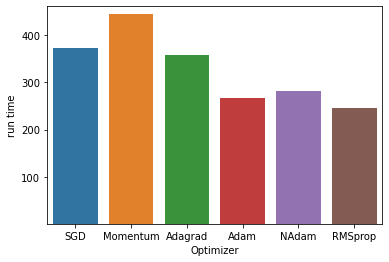

In [911]:
import seaborn as sns

fig , ax  = plt.subplots()
sns.barplot(x ='Optimizer',y='run time' , data=runtime_df)
ax.set_ylim(0.9,460)

(0.9, 100.0)

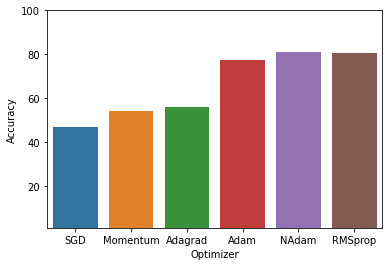

In [912]:
import seaborn as sns

fig , ax  = plt.subplots()
sns.barplot(x ='Optimizer',y='Accuracy' , data=test_df)
ax.set_ylim(0.9,100)

## Third Task: Classification model with CNN

In [641]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [642]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)


loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1e643ae07f0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1e65a61f6d0>}

In [643]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [644]:
len(loaders['train'])

600

In [645]:
len(loaders['train'].dataset)

60000

In [646]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [647]:
#The MNIST database contains 60,000 training images and 10,000 testing images.
print(train_data.data.size())

torch.Size([60000, 28, 28])


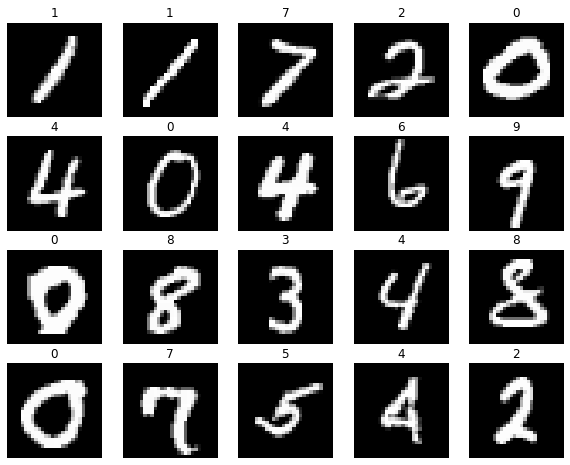

In [648]:
figure = plt.figure(figsize=(10, 8))
cols, rows =5,4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [649]:
#in_channels=1: because our input is a grayscale image.

import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

model = CNN()    

In [650]:
loss_fn = nn.CrossEntropyLoss()   
learning_rate = 0.01

In [651]:
def train(loaders,model,loss_fn, optimizer):
    
    model.train()
    total_step = len(loaders.dataset)

    for i, (images, labels) in enumerate(loaders):
        
        # Compute prediction and loss
        b_x = Variable(images)   # batch x
        b_y = Variable(labels)   # batch y
        output = model(b_x)[0]               
        loss = loss_fn(output, b_y)
        # Backpropagation
        optimizer.zero_grad()           
        loss.backward()             
        optimizer.step()                
            
        if (i+1) % 100 == 0:
            loss, current = loss.item(), (i+1) * len(images)
            print(f"loss: {loss:>7f}  [{current:>5d}/{total_step:>5d}]")               

In [652]:
def test(loaders, model, loss_fn):
    # Test the model
    model.eval()
    
    total_step = len(loaders.dataset)
    num_batches = len(loaders)
    correct = 0
#   total = 0
    test_loss = 0
    with torch.no_grad():
        for images, labels in loaders:
            test_output, last_layer = model(images)   #test_output=pred
            test_loss += loss_fn(test_output,labels).item()
            
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            
            correct += (pred_y == labels).sum().item()
    
    test_loss /= num_batches
    correct /= total_step
    Acc_test = 100*correct
    Avg_loss = test_loss
    return Acc_test , Avg_loss

    

In [653]:
# Specify a list to store the result
result_list = []
def store_result(cur_result_list, i_opt, i_epoch, i_Acc, i_Avg):
    new_result={
        'Optimizer': i_opt,
        'epoch': i_epoch,
        'Accuracy': i_Acc,
        'Avg loss': i_Avg
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

In [654]:
#Specify a list to store the run time of the optimizers
run_time_list = []
def store_time(cur_result_list, i_opt, i_time):
    new_result={
        'Optimizer': i_opt,
        'run time': i_time
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

### SGD

In [655]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Acc_list_SGD = []
Avg_list_SGD = []
optimizer_name = 'SGD'
start = timeit.default_timer()

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaders['train'], model, loss_fn, optimizer)

    Acc_test , Avg_loss = test(loaders['test'], model, loss_fn)
    Acc_list_SGD.append(Acc_test)
    Avg_list_SGD.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)
    
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 2.122066  [10000/60000]
loss: 1.042447  [20000/60000]
loss: 0.529839  [30000/60000]
loss: 0.383329  [40000/60000]
loss: 0.398186  [50000/60000]
loss: 0.401836  [60000/60000]
Test Error: 
 Accuracy: 90.5%, Avg loss: 0.323557 

Epoch 2
-------------------------------
loss: 0.257684  [10000/60000]
loss: 0.501604  [20000/60000]
loss: 0.287103  [30000/60000]
loss: 0.216696  [40000/60000]
loss: 0.264443  [50000/60000]
loss: 0.143224  [60000/60000]
Test Error: 
 Accuracy: 94.0%, Avg loss: 0.211175 

Epoch 3
-------------------------------
loss: 0.260998  [10000/60000]
loss: 0.215635  [20000/60000]
loss: 0.280248  [30000/60000]
loss: 0.165322  [40000/60000]
loss: 0.210517  [50000/60000]
loss: 0.222223  [60000/60000]
Test Error: 
 Accuracy: 95.4%, Avg loss: 0.161027 

Epoch 4
-------------------------------
loss: 0.203204  [10000/60000]
loss: 0.160898  [20000/60000]
loss: 0.138771  [30000/60000]
loss: 0.117760  [40000/60000]
loss: 0.125085  [50000/6

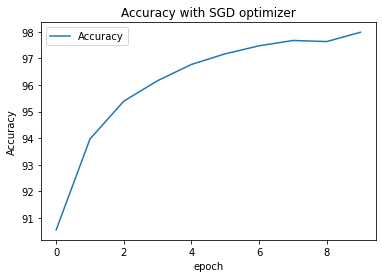

In [656]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_SGD,label='Accuracy')

plt.title('Accuracy with SGD optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

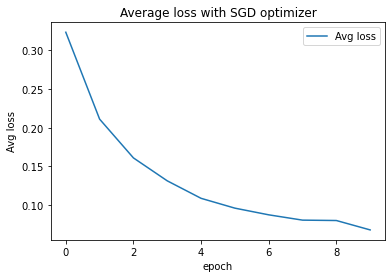

In [657]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_SGD,label='Avg loss')

plt.title('Average loss with SGD optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### SGD with Momentum

In [658]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)

Acc_list_Momentum = []
Avg_list_Momentum = []
optimizer_name = 'Momentum'
start = timeit.default_timer()

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaders['train'], model, loss_fn, optimizer)

    Acc_test , Avg_loss = test(loaders['test'], model, loss_fn)
    Acc_list_Momentum.append(Acc_test)
    Avg_list_Momentum.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)
    
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.086960  [10000/60000]
loss: 0.039647  [20000/60000]
loss: 0.057434  [30000/60000]
loss: 0.087532  [40000/60000]
loss: 0.089467  [50000/60000]
loss: 0.097460  [60000/60000]
Test Error: 
 Accuracy: 98.3%, Avg loss: 0.058248 

Epoch 2
-------------------------------
loss: 0.123830  [10000/60000]
loss: 0.134650  [20000/60000]
loss: 0.048782  [30000/60000]
loss: 0.049195  [40000/60000]
loss: 0.046884  [50000/60000]
loss: 0.051016  [60000/60000]
Test Error: 
 Accuracy: 98.6%, Avg loss: 0.043044 

Epoch 3
-------------------------------
loss: 0.024143  [10000/60000]
loss: 0.081955  [20000/60000]
loss: 0.042959  [30000/60000]
loss: 0.015678  [40000/60000]
loss: 0.027811  [50000/60000]
loss: 0.007761  [60000/60000]
Test Error: 
 Accuracy: 98.7%, Avg loss: 0.043634 

Epoch 4
-------------------------------
loss: 0.025905  [10000/60000]
loss: 0.058175  [20000/60000]
loss: 0.019566  [30000/60000]
loss: 0.033267  [40000/60000]
loss: 0.050334  [50000/6

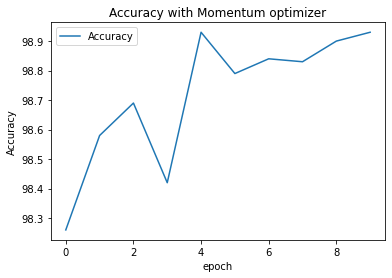

In [659]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_Momentum,label='Accuracy')

plt.title('Accuracy with Momentum optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

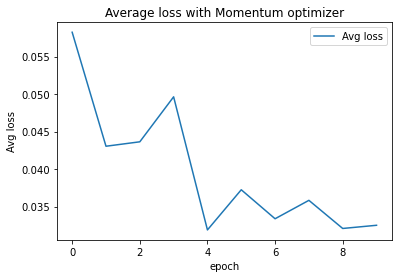

In [660]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_Momentum,label='Avg loss')

plt.title('Average loss with Momentum optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### Adagrad

In [661]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

Acc_list_Adagrad = []
Avg_list_Adagrad = []
optimizer_name = 'Adagrad'
start = timeit.default_timer()

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaders['train'], model, loss_fn, optimizer)

    Acc_test , Avg_loss = test(loaders['test'], model, loss_fn)
    Acc_list_Adagrad.append(Acc_test)
    Avg_list_Adagrad.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)
    
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.062369  [10000/60000]
loss: 0.026333  [20000/60000]
loss: 0.002510  [30000/60000]
loss: 0.017485  [40000/60000]
loss: 0.042456  [50000/60000]
loss: 0.013846  [60000/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.028548 

Epoch 2
-------------------------------
loss: 0.005039  [10000/60000]
loss: 0.022561  [20000/60000]
loss: 0.035372  [30000/60000]
loss: 0.004158  [40000/60000]
loss: 0.001584  [50000/60000]
loss: 0.001494  [60000/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.027880 

Epoch 3
-------------------------------
loss: 0.002338  [10000/60000]
loss: 0.009198  [20000/60000]
loss: 0.002094  [30000/60000]
loss: 0.008533  [40000/60000]
loss: 0.006793  [50000/60000]
loss: 0.003165  [60000/60000]
Test Error: 
 Accuracy: 99.1%, Avg loss: 0.025996 

Epoch 4
-------------------------------
loss: 0.002007  [10000/60000]
loss: 0.003813  [20000/60000]
loss: 0.036240  [30000/60000]
loss: 0.020923  [40000/60000]
loss: 0.012482  [50000/6

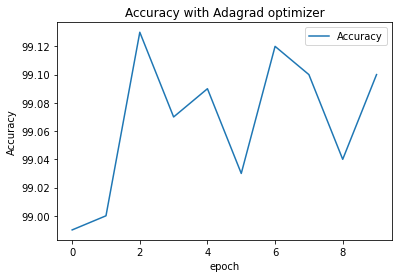

In [662]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_Adagrad,label='Accuracy')

plt.title('Accuracy with Adagrad optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

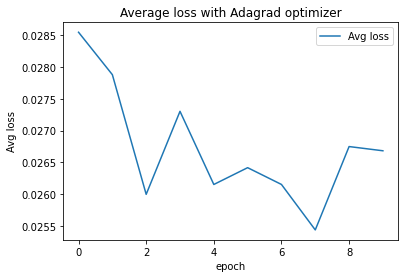

In [663]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_Adagrad,label='Avg loss')

plt.title('Average loss with Adagrad optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### Adam

In [664]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Acc_list_Adam = []
Avg_list_Adam = []
optimizer_name = 'Adam'
start = timeit.default_timer()

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaders['train'], model, loss_fn, optimizer)

    Acc_test , Avg_loss = test(loaders['test'], model, loss_fn)
    Acc_list_Adam.append(Acc_test)
    Avg_list_Adam.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)
    
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.078125  [10000/60000]
loss: 0.041640  [20000/60000]
loss: 0.034680  [30000/60000]
loss: 0.065984  [40000/60000]
loss: 0.055223  [50000/60000]
loss: 0.074604  [60000/60000]
Test Error: 
 Accuracy: 98.4%, Avg loss: 0.050932 

Epoch 2
-------------------------------
loss: 0.030709  [10000/60000]
loss: 0.055557  [20000/60000]
loss: 0.013478  [30000/60000]
loss: 0.030386  [40000/60000]
loss: 0.011632  [50000/60000]
loss: 0.012958  [60000/60000]
Test Error: 
 Accuracy: 98.6%, Avg loss: 0.047302 

Epoch 3
-------------------------------
loss: 0.018066  [10000/60000]
loss: 0.034786  [20000/60000]
loss: 0.031755  [30000/60000]
loss: 0.010692  [40000/60000]
loss: 0.096309  [50000/60000]
loss: 0.059471  [60000/60000]
Test Error: 
 Accuracy: 98.5%, Avg loss: 0.043619 

Epoch 4
-------------------------------
loss: 0.041766  [10000/60000]
loss: 0.051390  [20000/60000]
loss: 0.008239  [30000/60000]
loss: 0.024582  [40000/60000]
loss: 0.017276  [50000/6

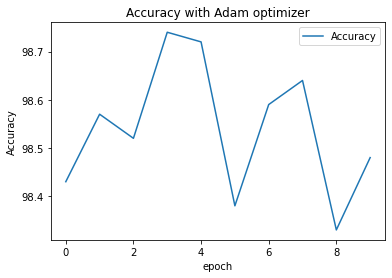

In [665]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_Adam,label='Accuracy')

plt.title('Accuracy with Adam optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

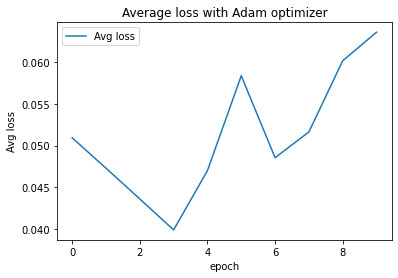

In [666]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_Adam,label='Avg loss')

plt.title('Average loss with Adam optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### NAdam

In [667]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

Acc_list_NAdam = []
Avg_list_NAdam = []
optimizer_name = 'NAdam'
start = timeit.default_timer()

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaders['train'], model, loss_fn, optimizer)

    Acc_test , Avg_loss = test(loaders['test'], model, loss_fn)
    Acc_list_NAdam.append(Acc_test)
    Avg_list_NAdam.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)
    
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.003344  [10000/60000]
loss: 0.008549  [20000/60000]
loss: 0.004347  [30000/60000]
loss: 0.001586  [40000/60000]
loss: 0.243975  [50000/60000]
loss: 0.074056  [60000/60000]
Test Error: 
 Accuracy: 98.8%, Avg loss: 0.056773 

Epoch 2
-------------------------------
loss: 0.001526  [10000/60000]
loss: 0.000434  [20000/60000]
loss: 0.082022  [30000/60000]
loss: 0.000528  [40000/60000]
loss: 0.106612  [50000/60000]
loss: 0.042075  [60000/60000]
Test Error: 
 Accuracy: 98.5%, Avg loss: 0.097738 

Epoch 3
-------------------------------
loss: 0.004216  [10000/60000]
loss: 0.010710  [20000/60000]
loss: 0.000142  [30000/60000]
loss: 0.003181  [40000/60000]
loss: 0.039861  [50000/60000]
loss: 0.074030  [60000/60000]
Test Error: 
 Accuracy: 98.5%, Avg loss: 0.091793 

Epoch 4
-------------------------------
loss: 0.065772  [10000/60000]
loss: 0.003071  [20000/60000]
loss: 0.000102  [30000/60000]
loss: 0.014659  [40000/60000]
loss: 0.003328  [50000/6

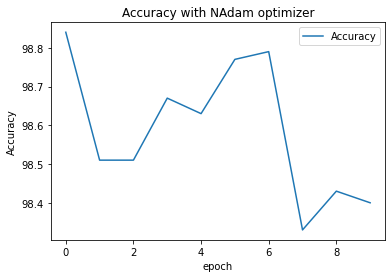

In [668]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_NAdam,label='Accuracy')

plt.title('Accuracy with NAdam optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

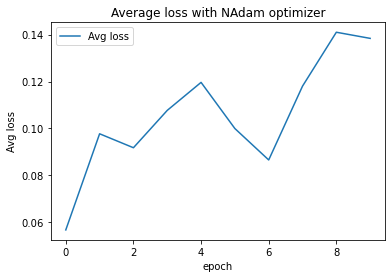

In [669]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_NAdam,label='Avg loss')

plt.title('Average loss with NAdam optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

### RMSprop

In [670]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

Acc_list_RMSprop = []
Avg_list_RMSprop = []
optimizer_name = 'RMSprop'
start = timeit.default_timer()

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaders['train'], model, loss_fn, optimizer)

    Acc_test , Avg_loss = test(loaders['test'], model, loss_fn)
    Acc_list_RMSprop.append(Acc_test)
    Avg_list_RMSprop.append(Avg_loss)
    print(f"Test Error: \n Accuracy: {(Acc_test):>0.1f}%, Avg loss: { Avg_loss:>8f} \n")
    result_list= store_result(result_list, optimizer_name, 
                               t, Acc_test,Avg_loss)
    
stop = timeit.default_timer()
run_time = stop - start  
run_time_list = store_time(run_time_list,optimizer_name,run_time)
print("Done!")

Epoch 1
-------------------------------
loss: 0.000000  [10000/60000]
loss: 0.006725  [20000/60000]
loss: 0.000000  [30000/60000]
loss: 0.000935  [40000/60000]
loss: 0.000000  [50000/60000]
loss: 0.104846  [60000/60000]
Test Error: 
 Accuracy: 98.7%, Avg loss: 0.159396 

Epoch 2
-------------------------------
loss: 0.000770  [10000/60000]
loss: 0.000435  [20000/60000]
loss: 0.000000  [30000/60000]
loss: 0.249967  [40000/60000]
loss: 0.000000  [50000/60000]
loss: 0.249594  [60000/60000]
Test Error: 
 Accuracy: 98.7%, Avg loss: 0.168459 

Epoch 3
-------------------------------
loss: 0.000001  [10000/60000]
loss: 0.213859  [20000/60000]
loss: 0.000004  [30000/60000]
loss: 0.000000  [40000/60000]
loss: 0.023448  [50000/60000]
loss: 0.007967  [60000/60000]
Test Error: 
 Accuracy: 98.7%, Avg loss: 0.145208 

Epoch 4
-------------------------------
loss: 0.000004  [10000/60000]
loss: 0.000045  [20000/60000]
loss: 0.000000  [30000/60000]
loss: 0.047363  [40000/60000]
loss: 0.048908  [50000/6

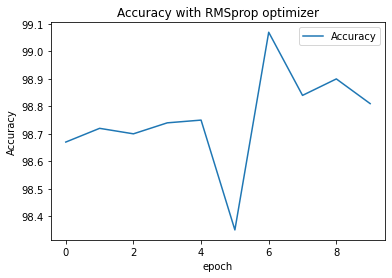

In [671]:
#plot accuracy in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Acc_list_RMSprop,label='Accuracy')

plt.title('Accuracy with RMSprop optimizer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

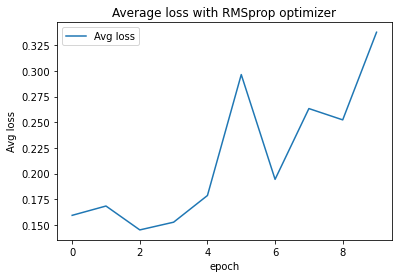

In [672]:
#plot Avg loss in each epoch
k_epoch = [0,1,2,3,4,5,6,7,8,9]
plt.plot(k_epoch,Avg_list_RMSprop,label='Avg loss')

plt.title('Average loss with RMSprop optimizer')
plt.xlabel('epoch')
plt.ylabel('Avg loss')
plt.legend()
plt.show()

In [673]:
result_df = pd.DataFrame.from_dict(result_list)
result_df

,Optimizer,epoch,Accuracy,Avg loss
0,SGD,0,90.55,0.323557
1,SGD,1,93.97,0.211175
2,SGD,2,95.39,0.161027
3,SGD,3,96.16,0.131370
4,SGD,4,96.77,0.108751
5,SGD,5,97.17,0.096043
6,SGD,6,97.47,0.087410
7,SGD,7,97.67,0.080545
8,SGD,8,97.63,0.080053
9,SGD,9,97.98,0.067889


In [674]:
time_df = pd.DataFrame.from_dict(run_time_list)
time_df

,Optimizer,run time
0,SGD,481.376192
1,Momentum,564.987673
2,Adagrad,588.204285
3,Adam,574.127774
4,NAdam,576.612297
5,RMSprop,570.779034


(0.9, 120.0)

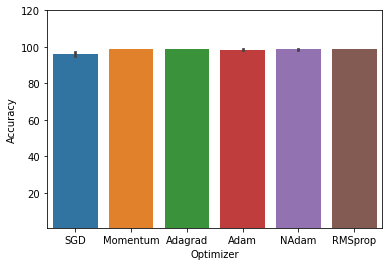

In [675]:
import seaborn as sns

fig , ax  = plt.subplots()
sns.barplot(x ='Optimizer',y='Accuracy' , data=result_df)
ax.set_ylim(0.9,120)

(0.9, 600.0)

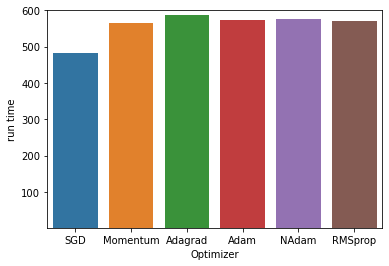

In [676]:
import seaborn as sns

fig , ax  = plt.subplots()
sns.barplot(x ='Optimizer',y='run time' , data=time_df)
ax.set_ylim(0.9,600)

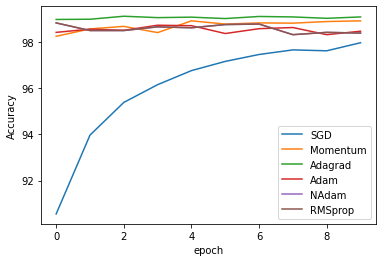

In [677]:
plt.plot(k_epoch,Acc_list_SGD, label = 'SGD')
plt.plot(k_epoch,Acc_list_Momentum, label = 'Momentum')
plt.plot(k_epoch,Acc_list_Adagrad, label = 'Adagrad')
plt.plot(k_epoch,Acc_list_Adam, label = 'Adam')
plt.plot(k_epoch,Acc_list_NAdam, label = 'NAdam')
plt.plot(k_epoch,Acc_list_NAdam, label = 'RMSprop')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

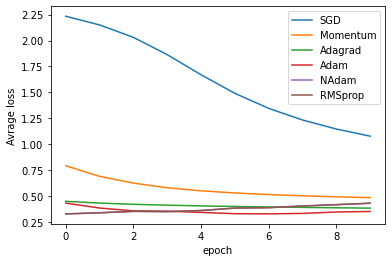

In [785]:
plt.plot(k_epoch,Avg_list_SGD, label = 'SGD')
plt.plot(k_epoch,Avg_list_Momentum, label = 'Momentum')
plt.plot(k_epoch,Avg_list_Adagrad, label = 'Adagrad')
plt.plot(k_epoch,Avg_list_Adam, label = 'Adam')
plt.plot(k_epoch,Avg_list_NAdam, label = 'NAdam')
plt.plot(k_epoch,Avg_list_NAdam, label = 'RMSprop')
plt.xlabel('epoch')
plt.ylabel('Avrage loss')
plt.legend()
plt.show()

In [932]:
#conduct the train and test
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

optimizer

RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.01
    momentum: 0
    weight_decay: 0
)